In [1]:
from scipy.io import arff
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder , StandardScaler , PolynomialFeatures , MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection  import train_test_split , cross_val_score , KFold
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense , Dropout
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, plot_confusion_matrix

from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import joblib

from scipy.spatial.distance import euclidean
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_set = 'diabetes' # diabetes , german_credit

In [3]:
if data_set == 'diabetes':
    data = arff.loadarff('/home/odedrot/DL_ex_4/Assignment 4 files/diabetes.arff')
if data_set == 'german_credit':
    data = arff.loadarff('/home/odedrot/DL_ex_4/Assignment 4 files/german_credit.arff')

df = pd.DataFrame(data[0])
np.random.seed()
df = df.reindex(np.random.permutation(df.index))
Ndata_points=len(df) # len(df)  for max
df=df[0:Ndata_points] 
df

,preg,plas,pres,skin,insu,mass,pedi,age,class
365,5.0,99.0,54.0,28.0,83.0,34.0,0.499,30.0,b'tested_negative'
716,3.0,173.0,78.0,39.0,185.0,33.8,0.970,31.0,b'tested_positive'
219,5.0,112.0,66.0,0.0,0.0,37.8,0.261,41.0,b'tested_positive'
732,2.0,174.0,88.0,37.0,120.0,44.5,0.646,24.0,b'tested_positive'
470,1.0,144.0,82.0,40.0,0.0,41.3,0.607,28.0,b'tested_negative'
...,...,...,...,...,...,...,...,...,...
355,9.0,165.0,88.0,0.0,0.0,30.4,0.302,49.0,b'tested_positive'
46,1.0,146.0,56.0,0.0,0.0,29.7,0.564,29.0,b'tested_negative'
278,5.0,114.0,74.0,0.0,0.0,24.9,0.744,57.0,b'tested_negative'
35,4.0,103.0,60.0,33.0,192.0,24.0,0.966,33.0,b'tested_negative'


In [4]:
X = pd.DataFrame()
y = pd.DataFrame()
X = df.drop(['class'], axis=1)
y = df['class']  
X = X.to_numpy()

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
y = np.hstack(y)

In [5]:
print( len(y[y==1]) )
print( len(y[y==0]) ) # more 0's than 1's

268
500


In [6]:
# split
X, y = shuffle(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [7]:
# balance training data
sampling='nothing'

# cut label 0 samples to be equal to label 1
if sampling == 'nothing':
    X_0_train = X_train[y_train==0]
    y_0_train = y_train[y_train==0]
    X_1_train = X_train[y_train==1]
    y_1_train = y_train[y_train==1]
    
if sampling == 'undersample':
    X_0_train = X_train[y_train==0][:len(y_train[y_train==1])]
    y_0_train = y_train[y_train==0][:len(y_train[y_train==1])]
    X_1_train = X_train[y_train==1]
    y_1_train = y_train[y_train==1]
if sampling=='oversample':
    X_0_train = X_train[y_train==0]
    y_0_train = y_train[y_train==0]
    delta = np.abs(len(y_train[y_train==0]) - len(y_train[y_train==1]))
    X_1_train = np.concatenate((X_train[y_train==1], X_train[y_train==1][:delta]))
    y_1_train = np.concatenate((y_train[y_train==1], y_train[y_train==1][:delta]))
    
    print(len(X_0_train)) 
    print(len(y_0_train)) 
    print(len(X_1_train)) 
    print(len(X_1_train)) 
    
    X_0_train = np.concatenate((X_0_train, X_0_train, X_0_train, X_0_train))
    y_0_train = np.concatenate((y_0_train, y_0_train, y_0_train, y_0_train))
    X_1_train = np.concatenate((X_1_train, X_1_train, X_1_train, X_1_train))
    y_1_train = np.concatenate((y_1_train, y_1_train, y_1_train, y_1_train))
                              
print(len(X_0_train))
print(len(y_0_train))
print(len(X_1_train))
print(len(X_1_train))     

358
358
179
179


In [8]:
print( len(y_train[y_train==1]) )
print( len(y_train[y_train==0]) )
print( len(y_test[y_test==1]) )
print( len(y_test[y_test==0]) )

179
358
89
142


In [9]:
# # normalize feature space 
sc = StandardScaler() # MinMaxScaler()  StandardScaler()
X_train = sc.fit_transform(X_train) # use training data to fit and transform
X_test = sc.transform(X_test) # only transormthe test data

# scaler = StandardScaler().fit(X)
# X_scaled = scaler.transform(X)

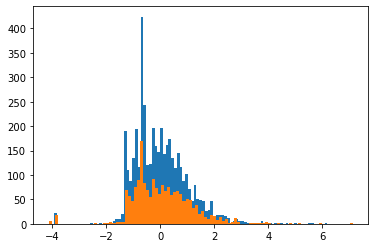

In [10]:
plt.hist(X_train.flatten(), 100)
plt.hist(X_test.flatten(), 100)
plt.show()

In [11]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state =42,  n_jobs=-1, verbose = 0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [12]:
train_prob = rf_model.predict(X_train)
test_prob = rf_model.predict(X_test)

print("Train Accuracy:",metrics.accuracy_score(y_train, train_prob))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_prob))


Train Accuracy: 1.0
Test Accuracy: 0.7662337662337663


In [13]:
scores = cross_val_score(rf_model, X_test, y_test)


In [14]:
print(scores.mean())


0.7445883441258094


Text(0.5, 1.0, 'rf train set')

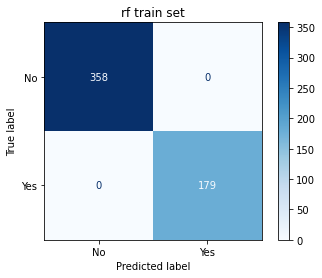

In [15]:
disp = plot_confusion_matrix(rf_model, X_train, y_train, display_labels=['No', 'Yes'], cmap=plt.cm.Blues,normalize=None)
disp.ax_.set_title('rf train set')


Text(0.5, 1.0, 'rf test set')

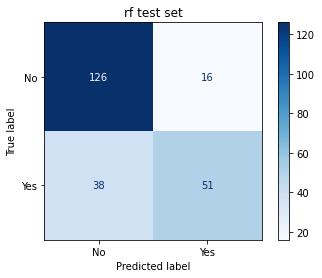

In [16]:
disp = plot_confusion_matrix(rf_model, X_test, y_test, display_labels=['No', 'Yes'], cmap=plt.cm.Blues,normalize=None)
disp.ax_.set_title('rf test set')
# 0 - 86%   1 - 68%


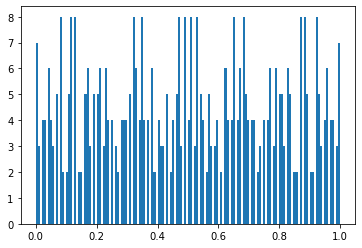

1.0
0.07
0.6527705627705629


In [17]:
# test probabilities score distribution
predictions = rf_model.predict_proba(X_test)
_ = plt.hist(predictions.flatten(), bins=150)
plt.show()
print(np.max(predictions[:,0]))
print(np.min(predictions[:,0]))
print(np.mean(predictions[:,0]))


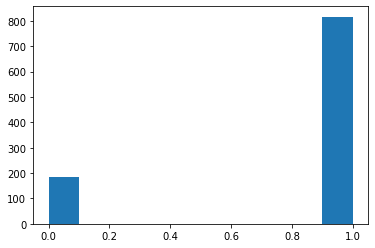

In [18]:
# random 8dim arrays
rand_features  = np.random.uniform(0, 1, (1000, 8))
y_label_rand = rf_model.predict(rand_features)
plt.hist(y_label_rand)
plt.show()

In [19]:
# joblib.dump(rf_model, "/home/odedrot/DL_ex_4/credit_trained_rf_standardscaler.joblib")